In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cpdata.csv')

In [3]:
df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,temperature,humidity,ph,rainfall,label
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon
3099,26.986037,89.413849,6.260839,58.548767,watermelon


In [5]:
df.size

15500

In [6]:
df.shape

(3100, 5)

In [7]:
df.columns

Index(['temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [9]:
df.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
df['label'].value_counts()

rice            100
Moth Beans      100
pomegranate     100
papaya          100
orange          100
muskmelon       100
mango           100
apple           100
grapes          100
banana          100
Chickpea        100
Pigeon Peas     100
Adzuki Beans    100
Black gram      100
Coconut         100
Kidney Beans    100
wheat           100
Tobacco         100
Sugarcane       100
Rubber          100
Peas            100
Ground Nut      100
Cotton          100
Coffee          100
Jute            100
Lentil          100
maize           100
millet          100
Tea             100
Mung Bean       100
watermelon      100
Name: label, dtype: int64

<AxesSubplot:>

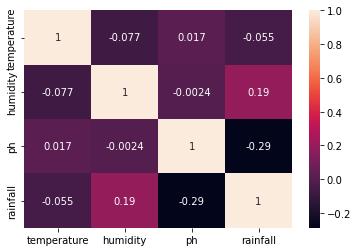

In [11]:
sns.heatmap(df.corr(),annot=True)

# Seperating features and target label

In [12]:
features = df[['temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [13]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  67.58064516129032
              precision    recall  f1-score   support

Adzuki Beans       0.00      0.00      0.00        19
  Black gram       0.49      1.00      0.66        21
    Chickpea       0.96      1.00      0.98        22
     Coconut       0.95      1.00      0.98        20
      Coffee       0.33      1.00      0.50        15
      Cotton       1.00      0.33      0.50        15
  Ground Nut       0.39      0.74      0.51        19
        Jute       0.00      0.00      0.00        19
Kidney Beans       1.00      0.94      0.97        17
      Lentil       0.79      1.00      0.88        19
  Moth Beans       0.79      0.48      0.59        23
   Mung Bean       1.00      1.00      1.00        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       0.00      0.00      0.00        23
      Rubber       0.00      0.00      0.00        24
   Sugarcane       0.50      0.86      0.63        14
         Tea       0.42      1.00

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [19]:
score

array([0.66451613, 0.68709677, 0.69032258, 0.70322581, 0.71290323])

# Saving trained Decision Tree model

In [20]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.932258064516129
              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       1.00      1.00      1.00        21
    Chickpea       1.00      1.00      1.00        22
     Coconut       1.00      1.00      1.00        20
      Coffee       0.79      0.73      0.76        15
      Cotton       0.86      0.80      0.83        15
  Ground Nut       0.95      1.00      0.97        19
        Jute       0.85      0.89      0.87        19
Kidney Beans       1.00      1.00      1.00        17
      Lentil       0.95      1.00      0.97        19
  Moth Beans       1.00      0.91      0.95        23
   Mung Bean       1.00      1.00      1.00        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       0.94      0.74      0.83        23
      Rubber       0.96      0.92      0.94        24
   Sugarcane       0.92      0.86      0.89        14
         Tea       0.95      1.00  

In [22]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.93548387, 0.93064516, 0.94193548, 0.92580645, 0.94193548])

In [23]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.6774193548387096
              precision    recall  f1-score   support

Adzuki Beans       1.00      0.11      0.19        19
  Black gram       0.81      0.81      0.81        21
    Chickpea       1.00      0.91      0.95        22
     Coconut       1.00      0.70      0.82        20
      Coffee       0.80      0.53      0.64        15
      Cotton       0.80      0.53      0.64        15
  Ground Nut       0.77      0.53      0.62        19
        Jute       0.82      0.74      0.78        19
Kidney Beans       1.00      0.71      0.83        17
      Lentil       0.86      0.63      0.73        19
  Moth Beans       0.90      0.39      0.55        23
   Mung Bean       1.00      0.90      0.95        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       0.13      0.91      0.23        23
      Rubber       1.00      0.08      0.15        24
   Sugarcane       0.60      0.43      0.50        14
         Tea       0.81      0.68      0.7

In [25]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.71612903, 0.70645161, 0.69677419, 0.69193548, 0.6483871 ])

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.5919354838709677
              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       0.52      0.57      0.55        21
    Chickpea       0.86      0.86      0.86        22
     Coconut       0.74      0.85      0.79        20
      Coffee       0.37      0.47      0.41        15
      Cotton       0.32      0.47      0.38        15
  Ground Nut       0.42      0.42      0.42        19
        Jute       0.53      0.53      0.53        19
Kidney Beans       0.85      0.65      0.73        17
      Lentil       0.59      0.53      0.56        19
  Moth Beans       0.58      0.48      0.52        23
   Mung Bean       0.59      0.50      0.54        20
        Peas       0.85      1.00      0.92        17
 Pigeon Peas       0.56      0.43      0.49        23
      Rubber       0.62      0.67      0.64        24
   Sugarcane       0.28      0.57      0.37        14
         Tea       0.50   

In [27]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.60645161, 0.6       , 0.59677419, 0.61290323, 0.57419355])

In [28]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9387096774193548
              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        19
  Black gram       1.00      1.00      1.00        21
    Chickpea       0.96      1.00      0.98        22
     Coconut       1.00      1.00      1.00        20
      Coffee       0.93      0.93      0.93        15
      Cotton       1.00      0.87      0.93        15
  Ground Nut       0.89      0.89      0.89        19
        Jute       0.81      0.89      0.85        19
Kidney Beans       1.00      0.94      0.97        17
      Lentil       0.86      1.00      0.93        19
  Moth Beans       1.00      0.83      0.90        23
   Mung Bean       1.00      1.00      1.00        20
        Peas       1.00      1.00      1.00        17
 Pigeon Peas       1.00      0.78      0.88        23
      Rubber       0.96      1.00      0.98        24
   Sugarcane       0.85      0.79      0.81        14
         Tea       1.00      0.95      0.97

In [30]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.94516129, 0.94677419, 0.94354839, 0.93709677, 0.94032258])

In [31]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

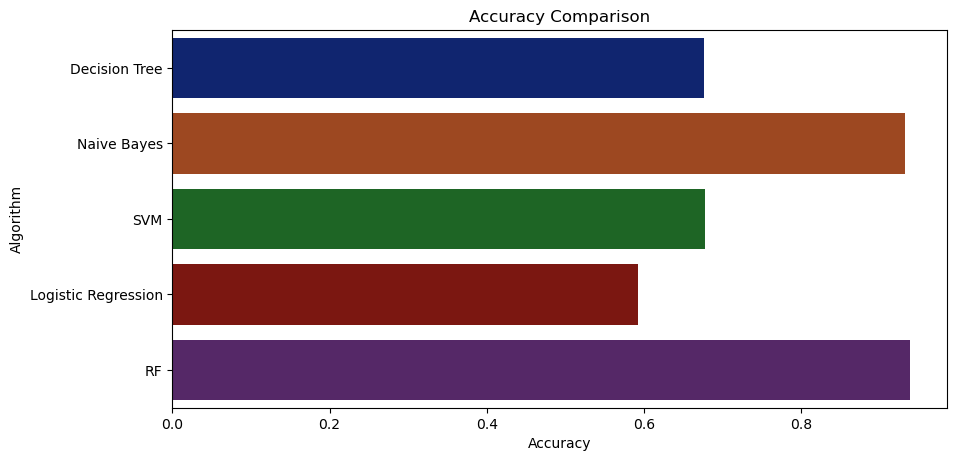

In [37]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [38]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.6758064516129032
Naive Bayes --> 0.932258064516129
SVM --> 0.6774193548387096
Logistic Regression --> 0.5919354838709677
RF --> 0.9387096774193548


# Making a prediction

In [40]:
data = np.array([[27.50568957,54.01820397,6.161839979,114.8541306]])
prediction = RF.predict(data)
print(prediction)

['wheat']


In [41]:
data = np.array([[21.68623299,55.48736922,4.5025967,156.5019951]])
prediction = RF.predict(data)
print(prediction)

['Tea']
